In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [2]:
# open file 
import os
print(os.listdir("/kaggle/input")) # open file
print("-----------------------------------------")

['sid-spider-train', 'isic-2019-7-classes', 'sid-spider-test']
-----------------------------------------


Path of Dataset

In [3]:
trainpath = "/kaggle/input/isic-2019-7-classes/dataset/train"
testpath = "/kaggle/input/isic-2019-7-classes/dataset/test"

In [4]:
trainspider = "/kaggle/input/sid-spider-train"
testspider= "/kaggle/input/sid-spider-test"

Analysis of Dataset

In [5]:
results2 = []
for folder in  os.listdir(trainpath + '/') : 
    dies_name_count = {}
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
    dies_name_count['disease']=folder
    dies_name_count['count_images']=len(files)
    results2.append(dies_name_count)
    print(f'For training data , found {len(files)} in folder {folder}')
for folder in  os.listdir(trainspider + '/') : 
    dies_name_count = {}
    files = gb.glob(pathname= str( trainspider +'/' + folder + '/*.jpg'))
    dies_name_count['disease']=folder
    dies_name_count['count_images']=len(files)
    results2.append(dies_name_count)
    print(f'For training data , found {len(files)} in folder {folder}')
pd.DataFrame(results2)

For training data , found 3842 in folder mel
For training data , found 211 in folder vasc
For training data , found 203 in folder df
For training data , found 10895 in folder nv
For training data , found 2267 in folder bkl
For training data , found 2825 in folder bcc
For training data , found 748 in folder ak
For training data , found 233 in folder Spider_Train


disease  count_images
0           mel          3842
1          vasc           211
2            df           203
3            nv         10895
4           bkl          2267
5           bcc          2825
6            ak           748
7  Spider_Train           233

In [6]:
results2 = []
for folder in  os.listdir(testpath + '/') : 
    dies_name_count = {}
    files = gb.glob(pathname= str( testpath +'/' + folder + '/*.jpg'))
    dies_name_count['disease']=folder
    dies_name_count['count_images']=len(files)
    results2.append(dies_name_count)
    print(f'For testing data , found {len(files)} in folder {folder}')
for folder in  os.listdir(testspider + '/') : 
    dies_name_count = {}
    files = gb.glob(pathname= str( testspider +'/' + folder + '/*.jpg'))
    dies_name_count['disease']=folder
    dies_name_count['count_images']=len(files)
    results2.append(dies_name_count)
    print(f'For testing data , found {len(files)} in folder {folder}')
pd.DataFrame(results2)

For testing data , found 680 in folder mel
For testing data , found 42 in folder vasc
For testing data , found 36 in folder df
For testing data , found 1980 in folder nv
For testing data , found 357 in folder bkl
For testing data , found 498 in folder bcc
For testing data , found 119 in folder ak
For testing data , found 55 in folder Spider_Test


disease  count_images
0          mel           680
1         vasc            42
2           df            36
3           nv          1980
4          bkl           357
5          bcc           498
6           ak           119
7  Spider_Test            55

In [7]:
results2

[{'disease': 'mel', 'count_images': 680},
 {'disease': 'vasc', 'count_images': 42},
 {'disease': 'df', 'count_images': 36},
 {'disease': 'nv', 'count_images': 1980},
 {'disease': 'bkl', 'count_images': 357},
 {'disease': 'bcc', 'count_images': 498},
 {'disease': 'ak', 'count_images': 119},
 {'disease': 'Spider_Test', 'count_images': 55}]

In [8]:
code = {'mel':0 ,'vasc':1,'df':2,'nv':3,'bkl':4,'bcc':5,'ak':6, 'spider': 7}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [9]:
size = []
for folder in  os.listdir(trainpath +'/') : 
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
    c_ssd=0
    for file in files: 
        if(c_ssd>300):
            break
        image = plt.imread(file)
        size.append(image.shape)
        c_ssd+=1

        
for folder in  os.listdir(trainspider +'/') : 
    files = gb.glob(pathname= str( trainspider +'/' + folder + '/*.jpg'))
    c_ssd=0
    for file in files: 
        if(c_ssd>200):
            break
        image = plt.imread(file)
        size.append(image.shape)
        c_ssd+=1
pd.Series(size).value_counts()

(1024, 1024, 3)    1138
(450, 600, 3)       657
(472, 720, 3)        50
(680, 1024, 3)       47
(768, 1024, 3)       34
                   ... 
(479, 720, 3)         1
(469, 720, 3)         1
(599, 720, 3)         1
(524, 720, 3)         1
(720, 466, 3)         1
Length: 86, dtype: int64

In [10]:
size = []
for folder in  os.listdir(testpath +'/') : 
    files = gb.glob(pathname= str( testpath +'/' + folder + '/*.jpg'))
    c_ssd=0
    for file in files: 
        if(c_ssd>20):
            break
        image = plt.imread(file)
        size.append(image.shape)
        c_ssd+=1

        
        
for folder in  os.listdir(testspider +'/') : 
    files = gb.glob(pathname= str( testspider +'/' + folder + '/*.jpg'))
    c_ssd=0
    for file in files: 
        if(c_ssd>20):
            break
        image = plt.imread(file)
        size.append(image.shape)
        c_ssd+=1
pd.Series(size).value_counts()

(1024, 1024, 3)    86
(450, 600, 3)      57
(472, 720, 3)       6
(480, 720, 3)       5
(464, 720, 3)       3
(680, 1024, 3)      2
(768, 1024, 3)      1
(685, 1024, 3)      1
(474, 720, 3)       1
(589, 720, 3)       1
(720, 479, 3)       1
(720, 477, 3)       1
(720, 472, 3)       1
(595, 720, 3)       1
(720, 493, 3)       1
dtype: int64

In [11]:
s = 200

Resize images and show Samples of images 

In [12]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'/') : 
    files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
    c_ssd=0
    for file in files: 
        if(c_ssd>1600):
            break
        image = plt.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])
        c_ssd+=1

In [13]:
files = gb.glob(pathname= str( trainspider +'/' + folder + '/*.jpg'))
c_ssd=0
for file in files: 
    if(c_ssd>1600):
        break
    image = plt.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_train.append(list(image_array))
    y_train.append(7)
    c_ssd+=1

In [14]:
print(f'we have {len(X_train)} items in X_train')

we have 7566 items in X_train


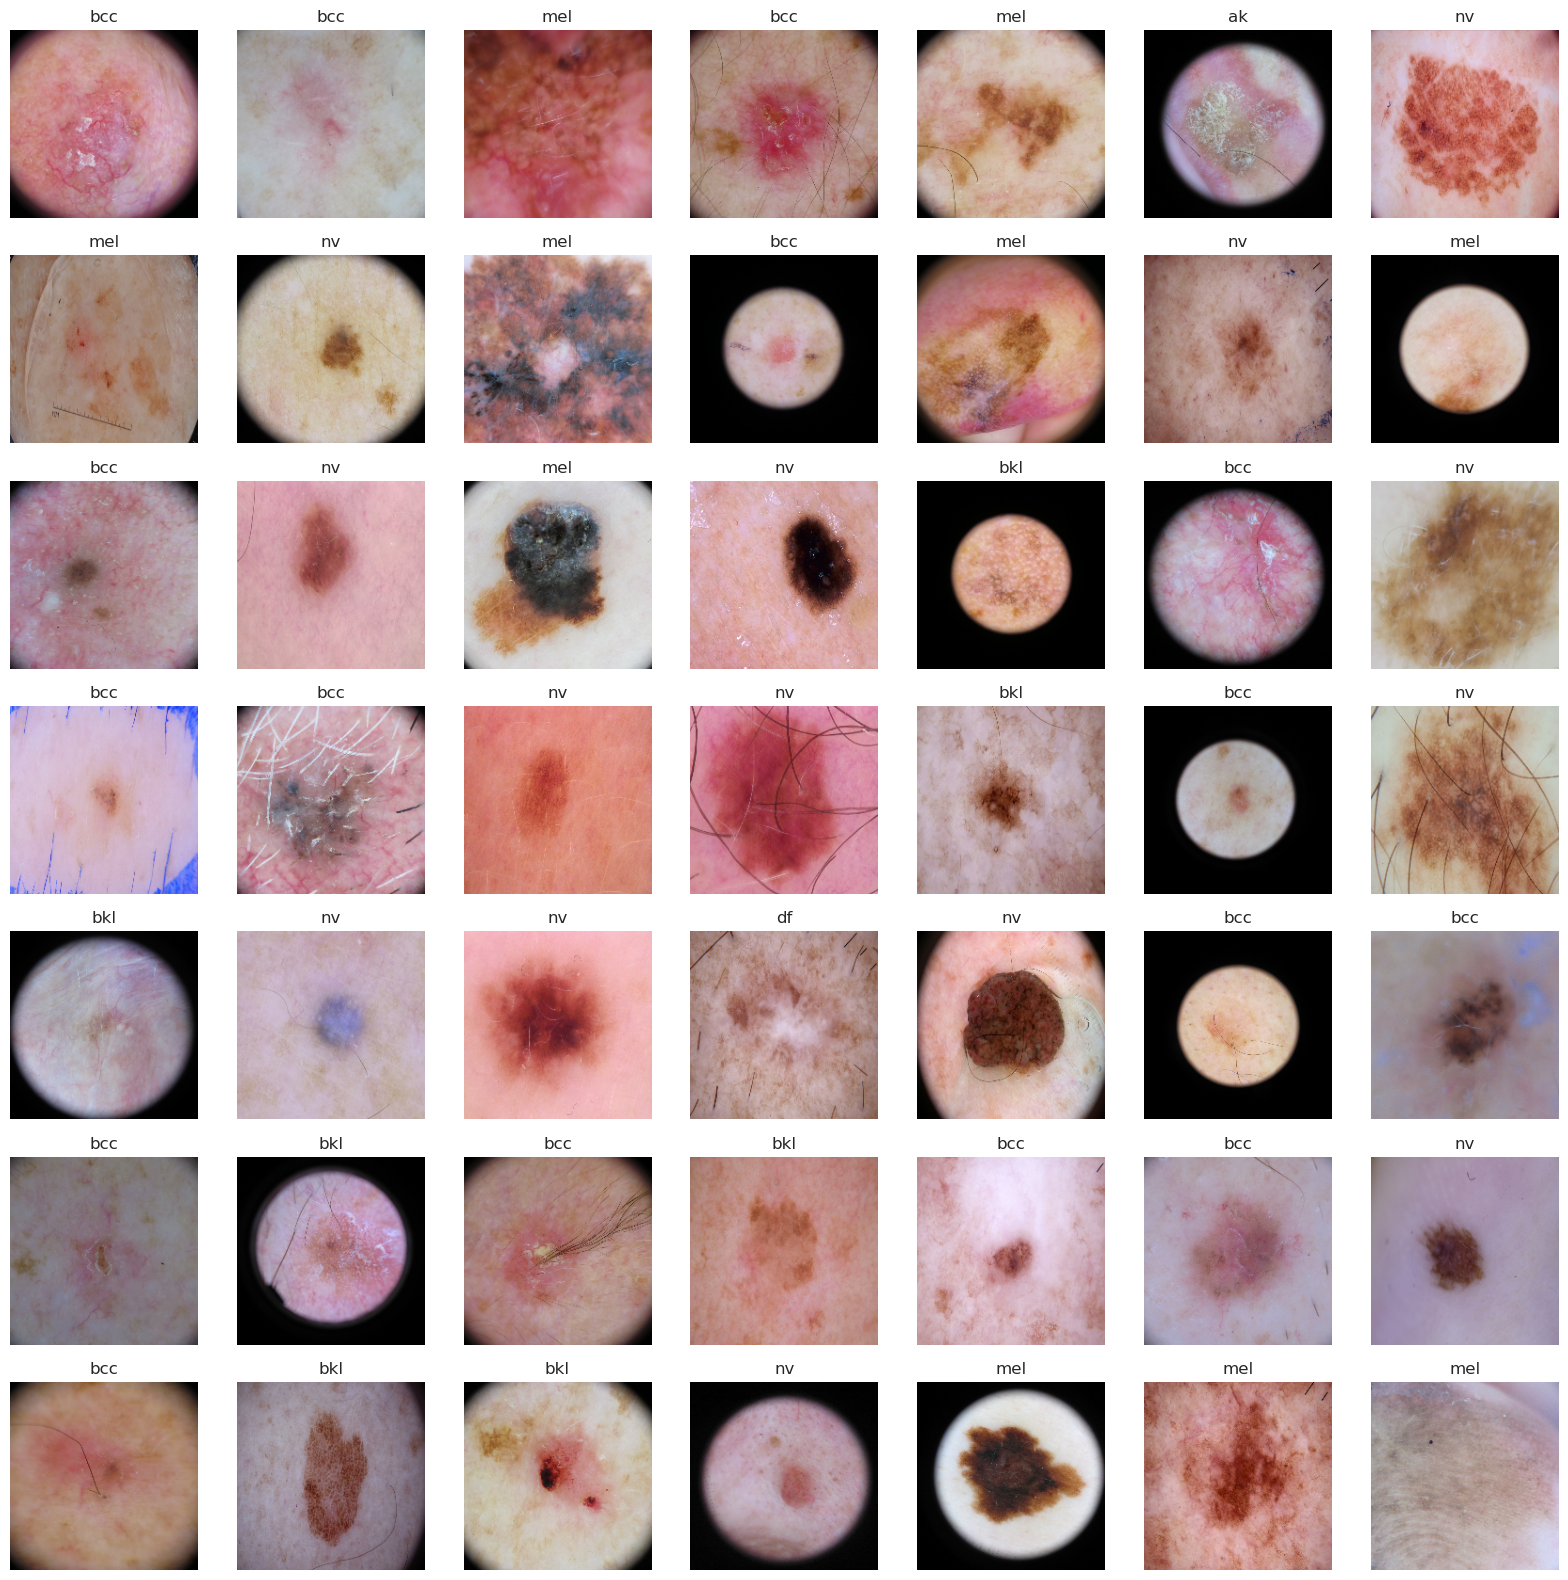

In [17]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),49))) : 
    plt.subplot(7,7,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

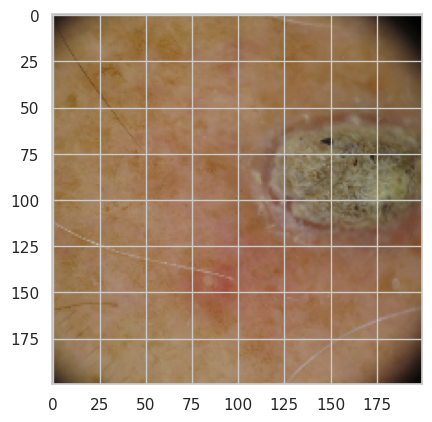

In [23]:
plt.imshow(X_train[7560])  

In [18]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'/') : 
    files = gb.glob(pathname= str(testpath + '/' + folder + '/*.jpg'))
    c_ssd=0
    for file in files: 
        if(c_ssd>400):
            break
        image = plt.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        c_ssd+=1

        
for folder in  os.listdir(testspider +'/') : 
    files = gb.glob(pathname= str(testspider + '/' + folder + '/*.jpg'))
    c_ssd=0
    for file in files: 
        if(c_ssd>400):
            break
        image = plt.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(7)
        c_ssd+=1

In [19]:
print(f'we have {len(X_test)} items in X_test')

we have 1812 items in X_test


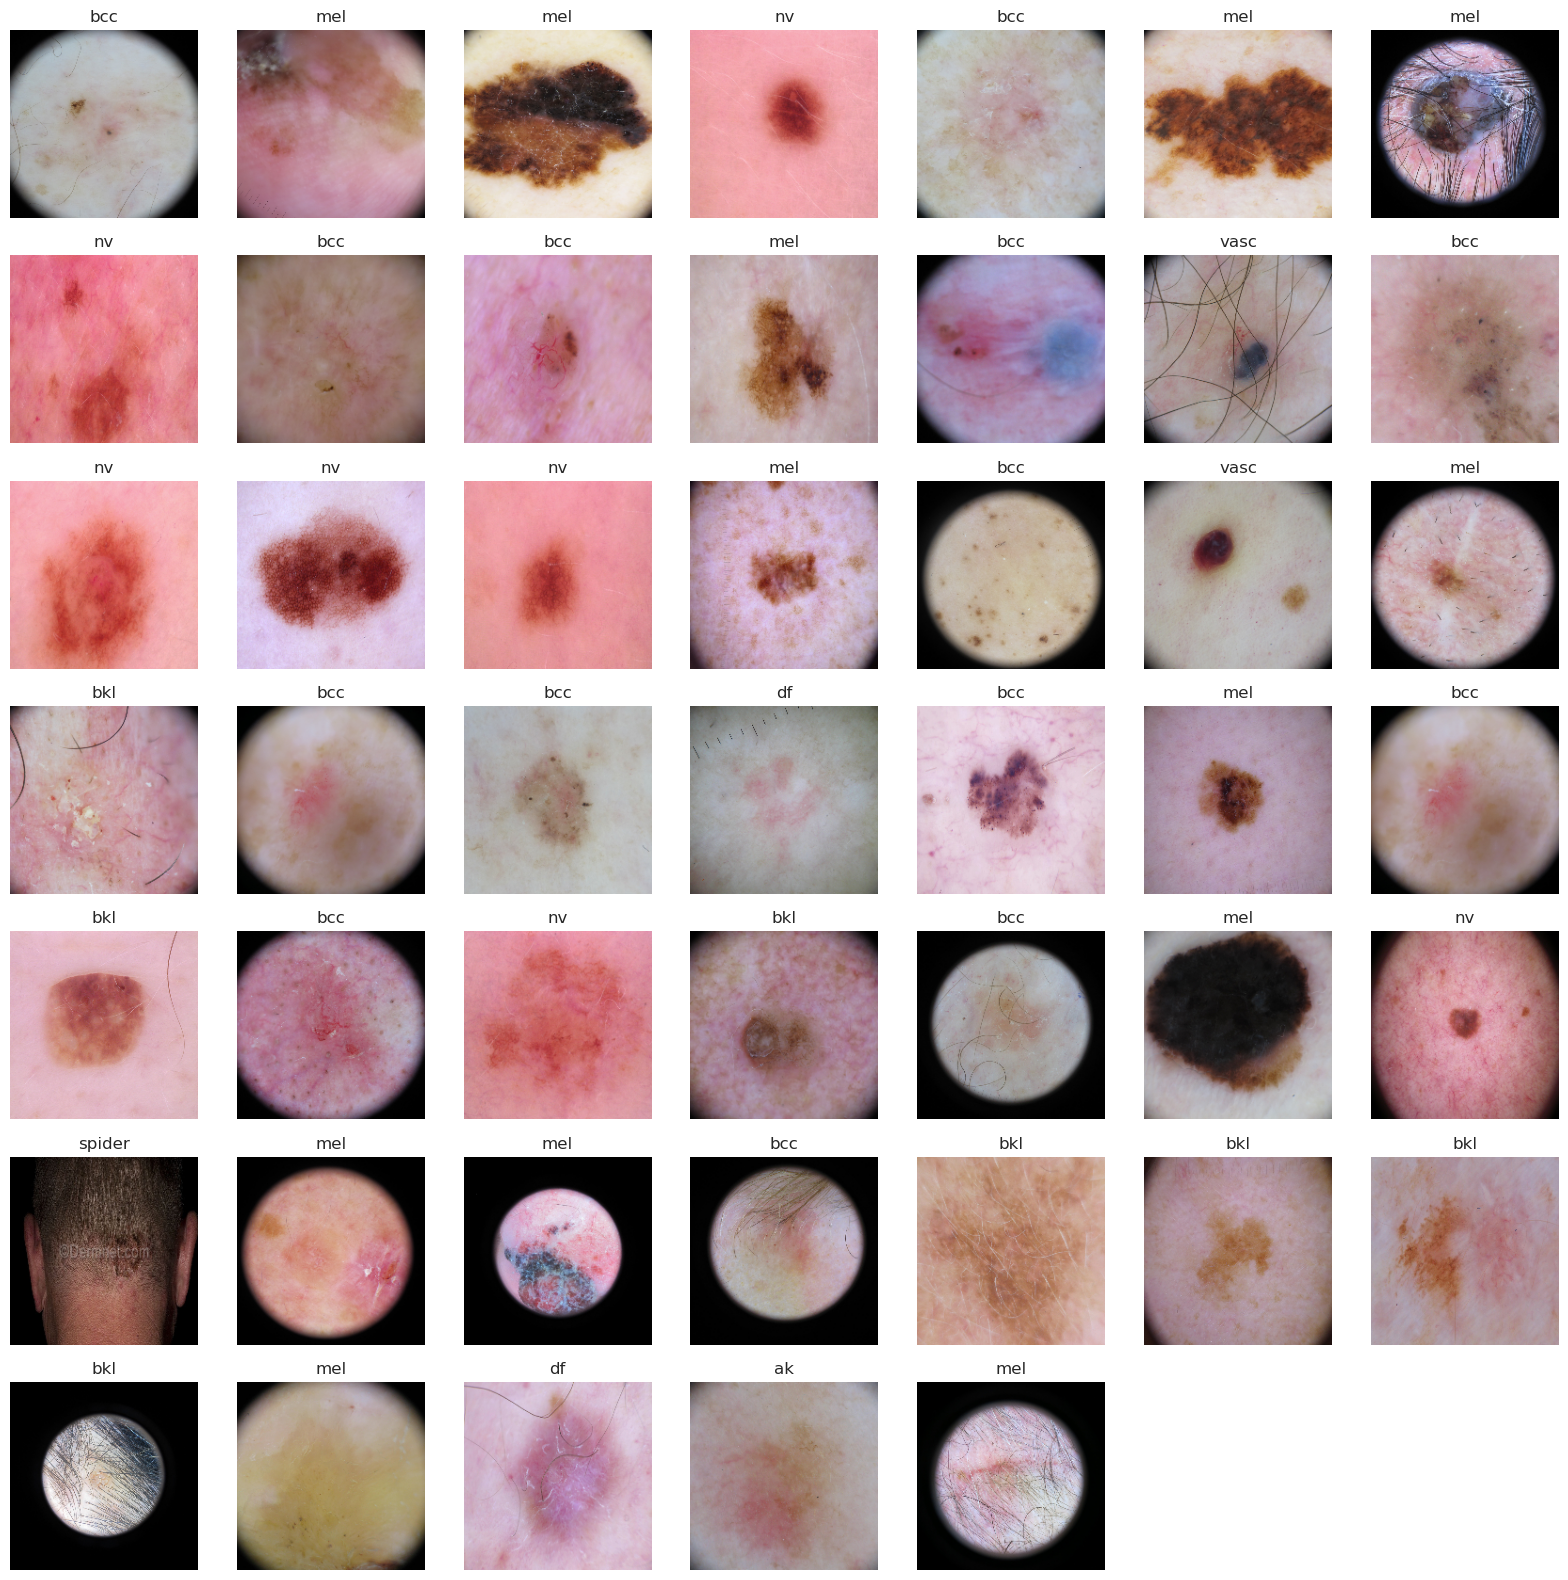

In [20]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),47))) : 
    plt.subplot(7,7,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

convert dataset to array

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)
#X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
#print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (7566, 200, 200, 3)
X_test shape  is (1812, 200, 200, 3)
y_train shape  is (7566,)
y_test shape  is (1812,)


In [93]:
s=200

Model CNN

In [24]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(100,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(100,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(150,activation='relu') ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(80,activation='relu') ,        
        keras.layers.Dropout(rate=0.4) ,            
        keras.layers.Dense(9,activation='softmax') ,    
        ])

In [25]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 150)     270150    
                                                                 
 conv2d_2 (Conv2D)           (None, 194, 194, 100)     135100    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 100)      0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 100)       90100     
                                                                 
 conv2d_4 (Conv2D)           (None, 44, 44, 80)        72080     
                                   

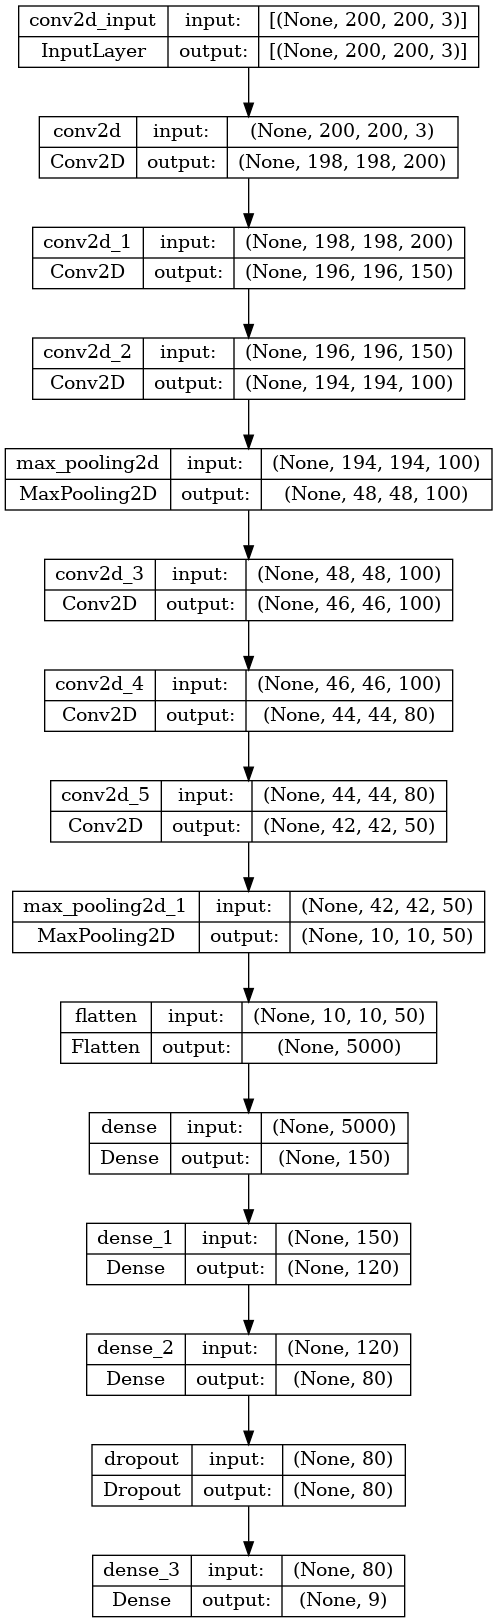

In [32]:
from keras.utils.vis_utils import plot_model
plot_model(KerasModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/50
119/119 [==============================] - 254s 2s/step - loss: 2.0721 - accuracy: 0.2230
Epoch 2/50
119/119 [==============================] - 203s 2s/step - loss: 1.7473 - accuracy: 0.2772
Epoch 3/50
119/119 [==============================] - 203s 2s/step - loss: 1.6557 - accuracy: 0.3278
Epoch 4/50
119/119 [==============================] - 202s 2s/step - loss: 1.6152 - accuracy: 0.3533
Epoch 5/50
119/119 [==============================] - 202s 2s/step - loss: 1.5418 - accuracy: 0.4021
Epoch 6/50
119/119 [==============================] - 201s 2s/step - loss: 1.5215 - accuracy: 0.4040
Epoch 7/50
119/119 [==============================] - 201s 2s/step - loss: 1.4861 - accuracy: 0.4259
Epoch 8/50
119/119 [==============================] - 201s 2s/step - loss: 1.4675 - accuracy: 0.4305
Epoch 9/50
119/119 [==============================] - 201s 2s/step - loss: 1.4372 - accuracy: 0.4441
Epoch 10/50
119/119 [==============================] - 199s 2s/step - loss: 1.4200 - accura

In [38]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

57/57 [==============================] - 9s 165ms/step - loss: 7.7155 - accuracy: 0.4398
Test Loss is 7.715494632720947
Test Accuracy is 0.439845472574234


In [54]:
ThisModel.history['accuracy']

[0.9837430715560913, 0.9877081513404846]

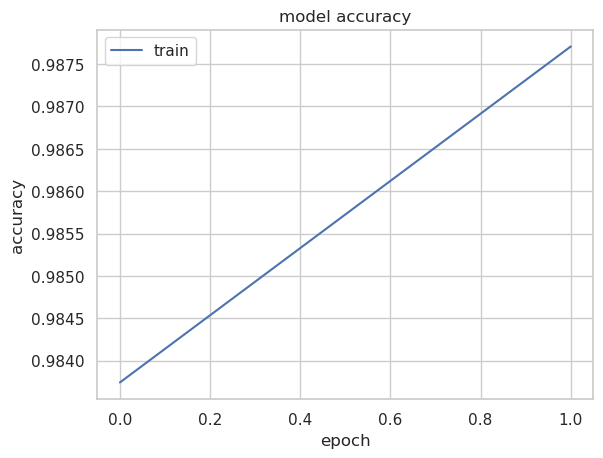

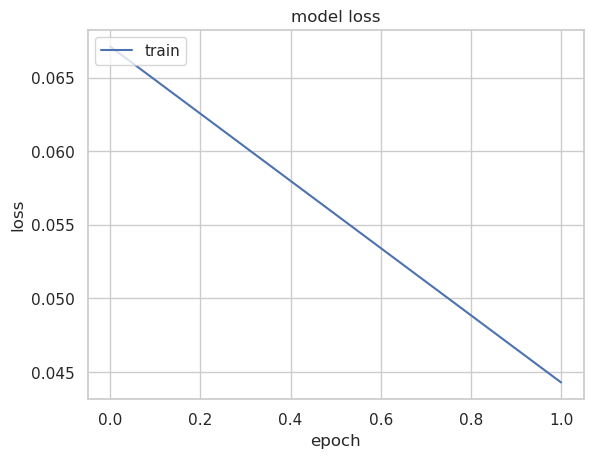

In [59]:
# summarize history for accuracy
plt.plot(ThisModel.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(ThisModel.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
print(ThisModel.history.keys())

dict_keys(['loss', 'accuracy'])


In [42]:
KerasModel.save('v1_model_ssd.h5')

In [43]:
KerasModel.save_weights('v1_weights_ssd.h5')

In [47]:
mod2=KerasModel
epochs = 2
ThisModel = mod2.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/2
119/119 [==============================] - 198s 2s/step - loss: 0.0671 - accuracy: 0.9837
Epoch 2/2
119/119 [==============================] - 197s 2s/step - loss: 0.0443 - accuracy: 0.9877


In [62]:
mod3=KerasModel
epochs = 1
ThisModel = mod3.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

119/119 [==============================] - 198s 2s/step - loss: 0.0815 - accuracy: 0.9773
